In [10]:
!pip install tweepy


In [0]:
!pip install textblob

    100% |████████████████████████████████| 645kB 5.8MB/s 


In [0]:
!pip install wordcloud

    100% |████████████████████████████████| 348kB 4.5MB/s 


In [0]:
import os
import numpy as np
import keras
import tensorflow as tf
import tweepy
import pandas as pd
import sys
import re
import matplotlib.pyplot as plt
import string
import seaborn as sns
import math
import nltk
import csv
import sklearn
import plotly.offline as py 
import plotly.graph_objs as go
import datetime
import tweepy
import textblob
import json
from nltk.corpus import stopwords
from matplotlib import pyplot
from wordcloud import WordCloud

Using TensorFlow backend.


In [0]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [0]:
from google.colab import files
uploaded = files.upload()

Saving nba10000.py to nba10000.py


In [0]:
!python nba10000.py > twitter_data.txt

In [0]:
from google.colab import files
files.download('twitter_data.txt') 

In [0]:
tweets_data_path = 'twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [78]:
print ('Total Tweets Count:{}'.format(len(tweets_data)))

Total Tweets Count:10001


In [0]:
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet:tweet['text'] if 'text' in tweet else ' ', tweets_data)
tweets['lang'] = map(lambda tweet: tweet.get('lang', None), tweets_data)

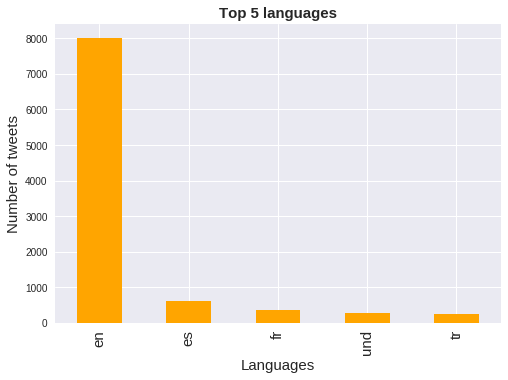

In [14]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange');
plt.savefig('top_5_langs.jpg',bbox_inches='tight', pad_inches=0.3)

In [0]:
def tweets_contain_keyword(keyword,df):
  key = df[df['text'].str.contains(keyword)].reset_index()
  return key

In [0]:
def tweets_contain_keyword_case_insenstive(keyword,df):
  a=tweets_contain_keyword(keyword.lower(),df)
  b=tweets_contain_keyword(keyword.upper(),df)
  c=tweets_contain_keyword(keyword[0].upper()+keyword[1:].lower(),df)
  frames =[a,b,c]
  result = pd.concat(frames).reset_index()
  return result

In [0]:
def counts_of_tweets(keyword,df):
  count= tweets_contain_keyword_case_insenstive(keyword,df)['text'].count()
  return count

In [0]:
def neutral_case_insenstive(keyword,df):
  df=df.drop('level_0', axis = 1)
  a=tweets_contain_keyword(keyword.lower(),df)
  b=tweets_contain_keyword(keyword.upper(),df)
  c=tweets_contain_keyword(keyword[0].upper()+keyword[1:].lower(),df)
  frames =[a,b,c]
  result = pd.concat(frames)
  return result

In [0]:
 def counts_comparison(team1,team2):
  keywords = [team1,team2,'Neutral/Both']
  Team_1 = tweets_contain_keyword_case_insenstive(team1,tweets)
  Team_2 = tweets_contain_keyword_case_insenstive(team2,tweets)
  Neutral =neutral_case_insenstive(team2,Team_1)
  
  count_of_tweets = [counts_of_tweets(team1,tweets),counts_of_tweets(team2,tweets),len(Neutral)]
  
  
  x = list(range(len(keywords)))
  width = 0.8 
  fig, ax = plt.subplots()
  plt.bar(x, count_of_tweets, width, alpha=1, color='g')

# Setting axis labels and ticks
  ax.set_ylabel('Number of tweets', fontsize=15)
  ax.set_title('Total tweets counts', fontsize=10, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])

  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)

tweets_by_keywords

In [0]:
from textblob import TextBlob
def sentiment(x):
    sentValue = TextBlob(x)
    return sentValue.sentiment.polarity

In [0]:
from __future__ import division

def tweet_sentiment(team):
  Team = tweets_contain_keyword_case_insenstive(team,tweets)
  Team['sentiment'] = Team['text'].apply(sentiment)
  #print( Team['sentiment'])
  Total= len(Team)
  conditions = [
    (Team['sentiment'] > 0 ),
    (Team['sentiment'] < 0),
    (Team['sentiment'] == 0)]
  Team['positive'] = Team['text'][Team['sentiment'] > 0]
  Team['negative'] = Team['text'][Team['sentiment'] < 0]
  Team['neutral'] = Team['text'][Team['sentiment'] == 0]

  print(team +": ")
  print('total tweets: %d'%len( Team))
  
  print('Positive Tweets: %d, percentage: %f' % (Team['positive'].count(), Team['positive'].count()/Total*100) + '%')
  print('Negative Tweets: %d, percentage: %f' % (Team['negative'].count(), Team['negative'].count()/Total*100) + '%')
  print('Neutral Tweets: %d, percentage: %f' % (Team['neutral'].count(), Team['neutral'].count()/Total*100) + '%')
  
  result={}
  result['p']={'count':Team['positive'].count(),'percentage':Team['positive'].count()/Total*100}
  result['na']={'count':Team['negative'].count(),'percentage':Team['negative'].count()/Total*100}
  result['ne']={'count':Team['neutral'].count(),'percentage':Team['neutral'].count()/Total*100}
  
  return result

In [0]:
def compare_positive(team1, team2):
  
  keywords=[team1, team2]
  
  dict1 = tweet_sentiment(team1) 
  dict2 = tweet_sentiment(team2) 
  #Positive count
  counts=[dict1['p']['count'],dict2['p']['count']]
  x = [1,2]
  width = 0.6
  fig, ax = plt.subplots()
  plt.bar(x, counts, width, alpha=1, color='g')
  ax.set_ylabel('Number of tweets', fontsize=15)
  ax.set_title('Positive Tweets Counts', fontsize=15, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])
  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)
  
  #Positive %
  counts=[dict1['p']['percentage'],dict2['p']['percentage']]
  x = [1,2]
  width = 0.6
  fig, ax = plt.subplots()
  plt.bar(x, counts, width, alpha=1, color='g')
  ax.set_ylabel('Percentage of total tweets', fontsize=15)
  ax.set_title('Positive Tweets Percentage', fontsize=15, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])
  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)
  
 



In [0]:
def compare_negative(team1,team2):
  keywords=[team1, team2]
  dict1 = tweet_sentiment(team1) 
  dict2 = tweet_sentiment(team2)
   #Negative counts
  counts=[dict1['na']['count'],dict2['na']['count']]
  x = [1,2]
  width = 0.6
  fig, ax = plt.subplots()
  plt.bar(x, counts, width, alpha=1, color='g')
  ax.set_ylabel('Number of tweets', fontsize=15)
  ax.set_title('Negative Tweets Counts', fontsize=15, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])
  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)
  
  #Negative %
  counts=[dict1['na']['percentage'],dict2['na']['percentage']]
  x = [1,2]
  width = 0.6
  fig, ax = plt.subplots()
  plt.bar(x, counts, width, alpha=1, color='g')
  ax.set_ylabel('Percentage of total tweets', fontsize=15)
  ax.set_title('Negative Tweets Percentage', fontsize=15, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])
  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)

In [0]:
def compare_neutral(team1,team2):
  keywords=[team1, team2]
  dict1 = tweet_sentiment(team1) 
  dict2 = tweet_sentiment(team2)
    #Neutral count
  counts=[dict1['ne']['count'],dict2['na']['count']]
  x = [1,2]
  width = 0.6
  fig, ax = plt.subplots()
  plt.bar(x, counts, width, alpha=1, color='g')
  ax.set_ylabel('Number of tweets', fontsize=15)
  ax.set_title('Neutral Tweets Counts', fontsize=15, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])
  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)

  #Neutral %
  counts=[dict1['ne']['percentage'],dict2['ne']['percentage']]
  x = [1,2]
  width = 0.6
  fig, ax = plt.subplots()
  plt.bar(x, counts, width, alpha=1, color='g')
  ax.set_ylabel('Percentage of total tweets', fontsize=15)
  ax.set_title('Neutral Tweets Percentage', fontsize=15, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])
  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)

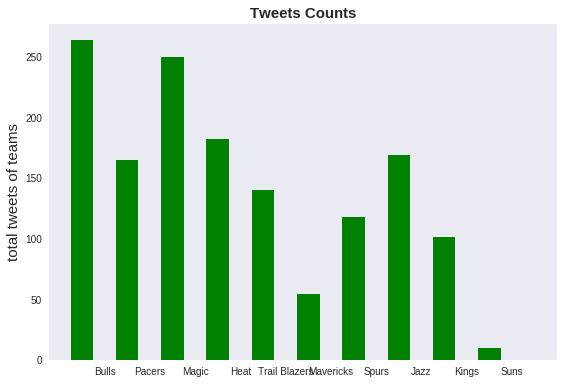

In [64]:
counts =[counts_of_tweets('Bulls',tweets),counts_of_tweets('Pacers',tweets),counts_of_tweets('Magic',tweets),
        counts_of_tweets('Heat',tweets),counts_of_tweets('Trailblazers',tweets),counts_of_tweets('Mavericks',tweets),
        counts_of_tweets('Spurs',tweets),counts_of_tweets('Jazz',tweets),counts_of_tweets('Kings',tweets),
        counts_of_tweets('Suns',tweets)]



teams=['Bulls','Pacers','Magic','Heat','Trail Blazers','Mavericks', 'Spurs', 'Jazz', 'Kings','Suns']



x=[0,1,2,3,4,5,6,7,8,9,10]
width = 0.5
fig, ax = plt.subplots()
plt.bar(teams, counts, width, alpha=1, color='g')
ax.set_ylabel('total tweets of teams', fontsize=15)
ax.set_title('Tweets Counts', fontsize=15, fontweight='bold')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(teams)
plt.grid()
plt.tight_layout()
plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)

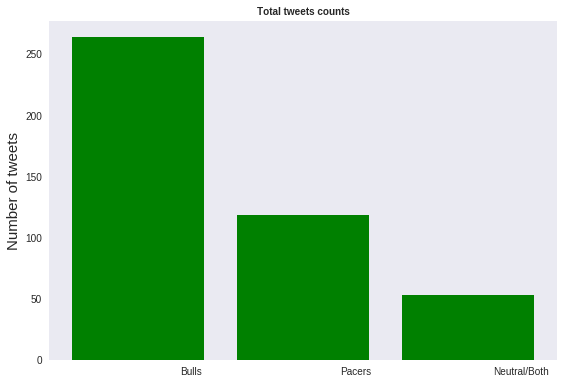

In [65]:
counts_comparison('Bulls','Pacers')


Bulls: 
total tweets: 264
Positive Tweets: 48, percentage: 18.181818%
Negative Tweets: 29, percentage: 10.984848%
Neutral Tweets: 187, percentage: 70.833333%
Pacers: 
total tweets: 118
Positive Tweets: 33, percentage: 27.966102%
Negative Tweets: 9, percentage: 7.627119%
Neutral Tweets: 76, percentage: 64.406780%


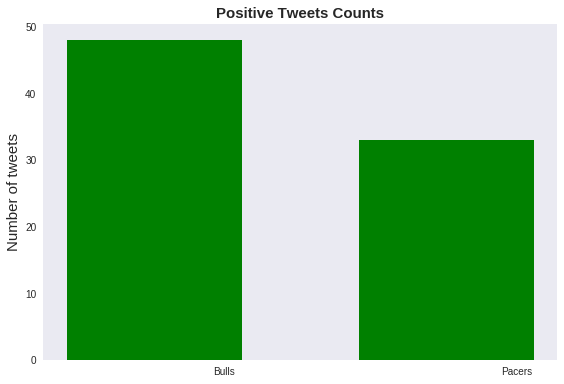

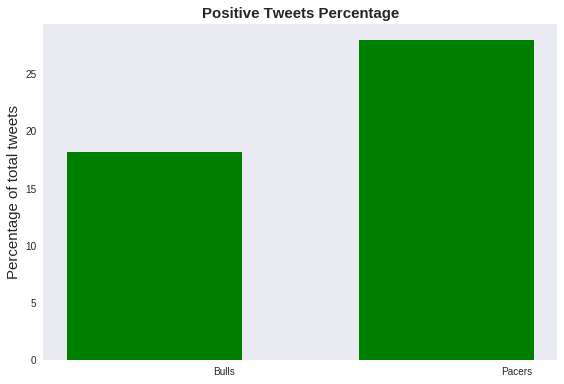

In [66]:
compare_positive('Bulls','Pacers')
#Warriors win

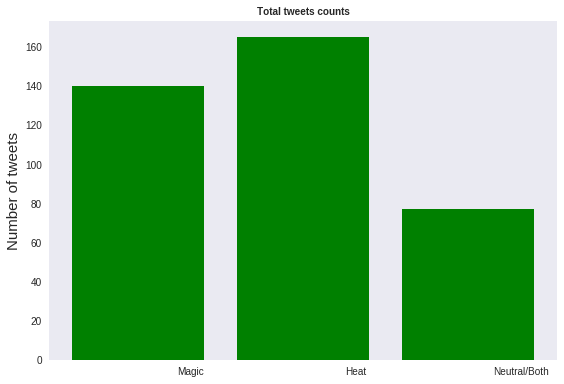

In [67]:


counts_comparison('Magic','Heat')

Magic: 
total tweets: 140
Positive Tweets: 113, percentage: 80.714286%
Negative Tweets: 4, percentage: 2.857143%
Neutral Tweets: 23, percentage: 16.428571%
Heat: 
total tweets: 165
Positive Tweets: 87, percentage: 52.727273%
Negative Tweets: 17, percentage: 10.303030%
Neutral Tweets: 61, percentage: 36.969697%


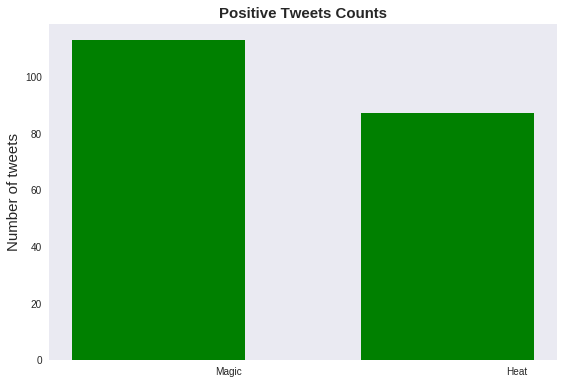

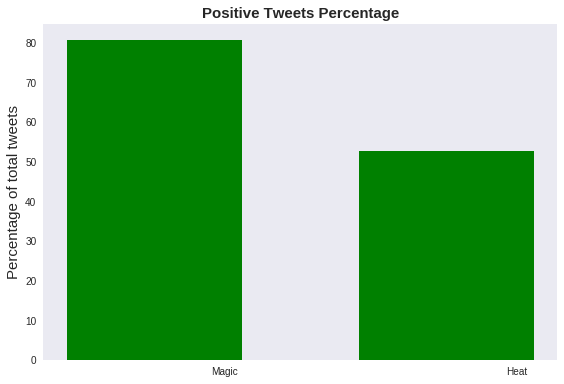

In [68]:


compare_positive('Magic','Heat')


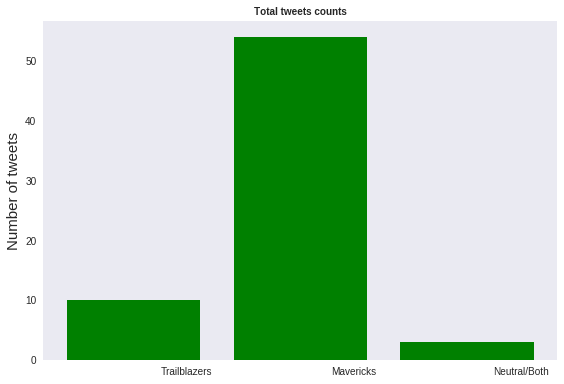

In [70]:


counts_comparison('Trailblazers','Mavericks')

Trailblazers: 
total tweets: 10
Positive Tweets: 4, percentage: 40.000000%
Negative Tweets: 0, percentage: 0.000000%
Neutral Tweets: 6, percentage: 60.000000%
Mavericks: 
total tweets: 54
Positive Tweets: 21, percentage: 38.888889%
Negative Tweets: 6, percentage: 11.111111%
Neutral Tweets: 27, percentage: 50.000000%


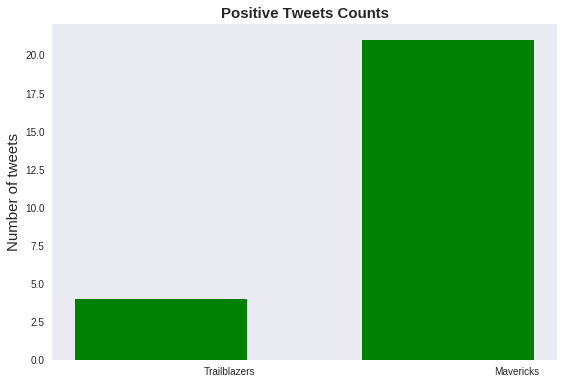

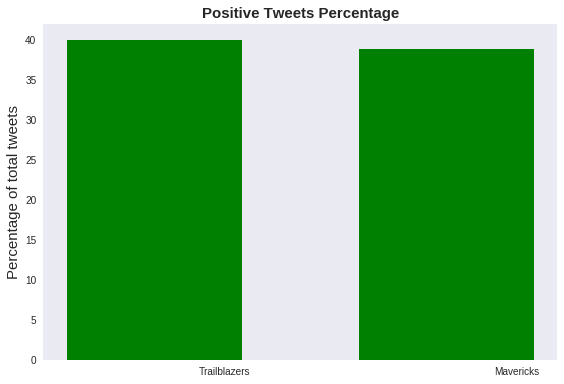

In [71]:
compare_positive('Trailblazers','Mavericks')
#I predict nets win

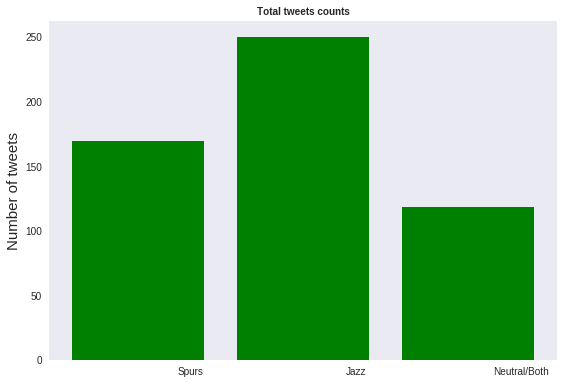

In [72]:
counts_comparison('Spurs', 'Jazz')

Spurs: 
total tweets: 169
Positive Tweets: 71, percentage: 42.011834%
Negative Tweets: 15, percentage: 8.875740%
Neutral Tweets: 83, percentage: 49.112426%
Jazz: 
total tweets: 250
Positive Tweets: 55, percentage: 22.000000%
Negative Tweets: 36, percentage: 14.400000%
Neutral Tweets: 159, percentage: 63.600000%


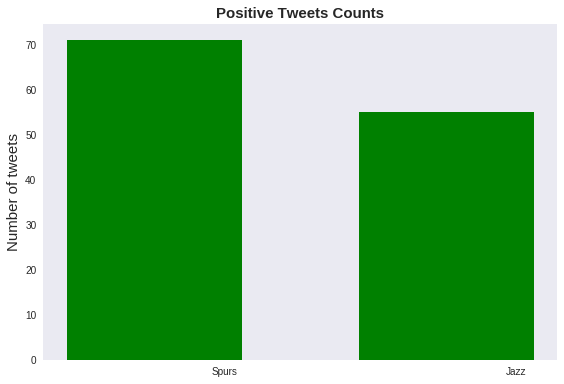

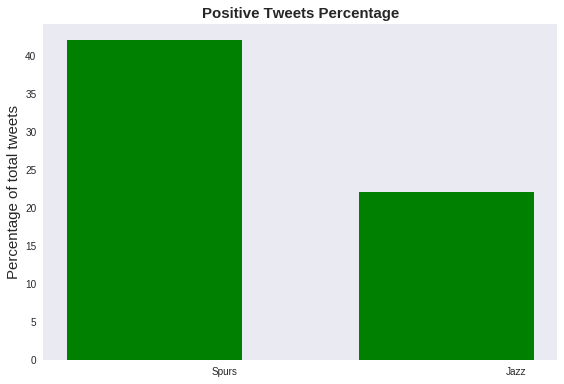

In [73]:
compare_positive('Spurs', 'Jazz')

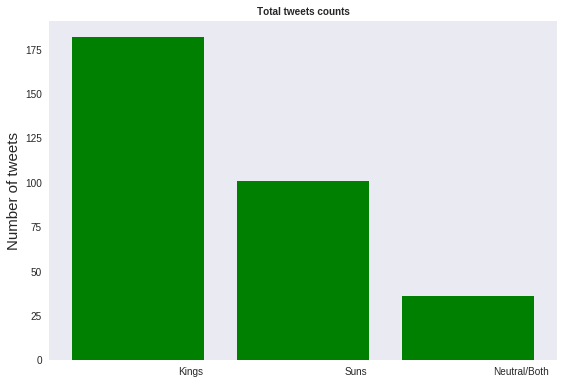

In [74]:
counts_comparison('Kings','Suns')

Kings: 
total tweets: 182
Positive Tweets: 81, percentage: 44.505495%
Negative Tweets: 10, percentage: 5.494505%
Neutral Tweets: 91, percentage: 50.000000%
Suns: 
total tweets: 101
Positive Tweets: 28, percentage: 27.722772%
Negative Tweets: 7, percentage: 6.930693%
Neutral Tweets: 66, percentage: 65.346535%


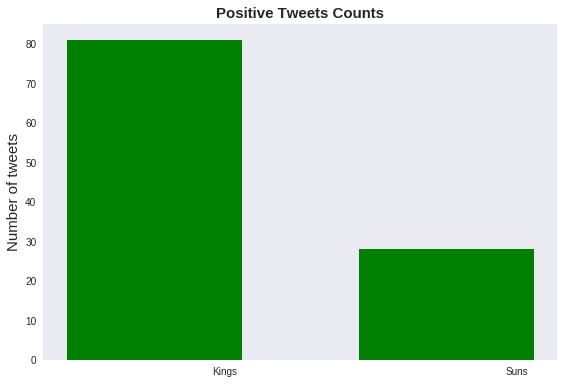

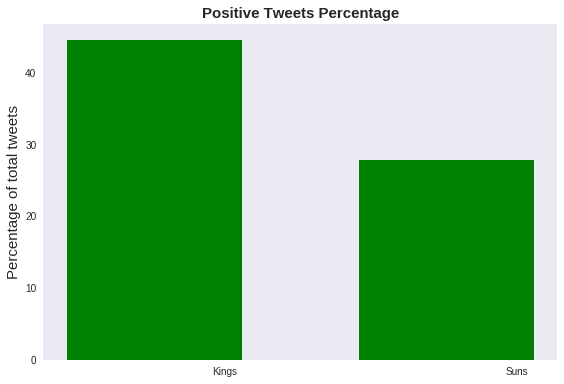

In [75]:
compare_positive('Kings', 'Suns')

In [0]:

from nltk.stem.porter import *
def clean_text(team):
  Team = tweets_contain_keyword_case_insenstive(team,tweets)
  Team ['text'] = Team ['text'].str.replace(r'http\S+', " ", case=False)
  Team ['text'] = Team ['text'].str.replace('RT @[\w]*', " ", case=False)
  Team ['text'] = Team ['text'].str.replace('&gt', " ", case=False)
  Team ['text'] = Team ['text'].str.replace("[#,:,@,!,%^&*]", " ", case=False)
  Team ['text'] = Team ['text'].str.replace("www", " ", case=False)
  tokens = Team['text'].apply(lambda x: x.split())
  
  stop_words = set(stopwords.words('english'))

  stemmer = PorterStemmer()
  tokens = tokens.apply(lambda x: [stemmer.stem(i)for i in x])

  for i in range(len(tokens)):
     tokens[i] = ' '.join(tokens[i])

  tokens2 = []
  for w in tokens:
     if w not in stop_words:
          tokens2.append(w)
        
  Team['Tokens'] = tokens
  Team['text'].replace('', np.nan, inplace=True)
  Team.dropna(subset=['text'], inplace=True)

  return Team['Tokens']
  
  
#clean_text('Rockets')

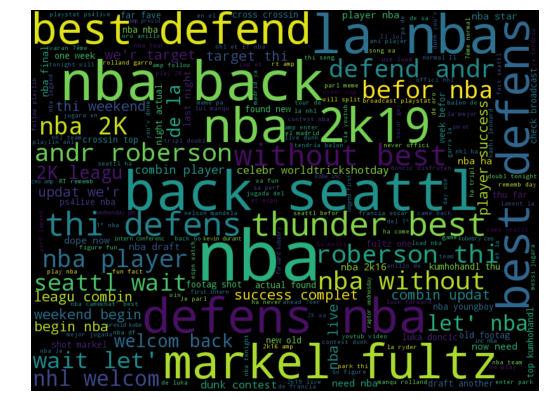

In [76]:
def wordcloud_pic(team):
  cleaned=clean_text(team)
  all_words = ' '.join([text for text in cleaned])
  wordcloud = WordCloud(width=800, 
                      height=600, 
                      random_state=21, 
                      max_font_size=110).generate(all_words)

  plt.figure(figsize=(10, 7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()
  
wordcloud_pic('NBA')  

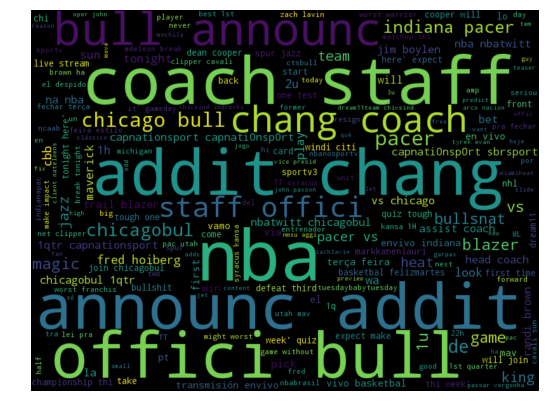

In [51]:
wordcloud_pic('Bulls')

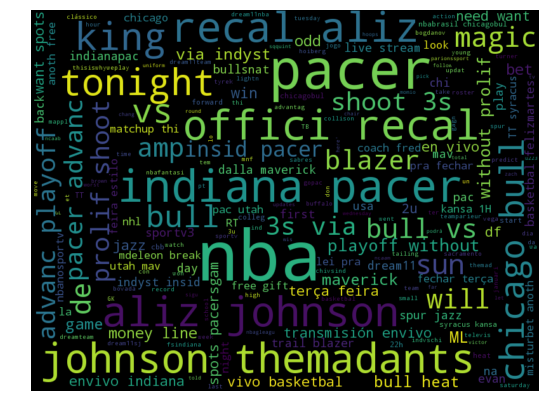

In [52]:
wordcloud_pic('Pacers')

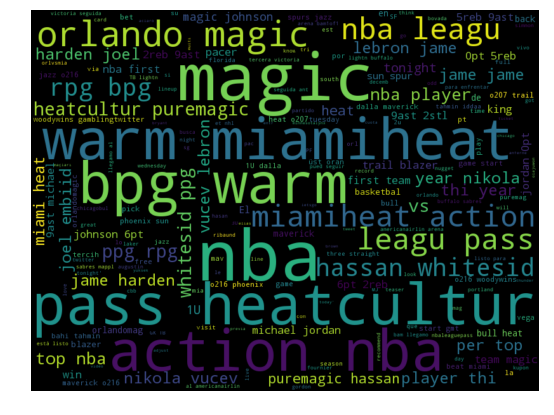

In [53]:
wordcloud_pic('Magic')

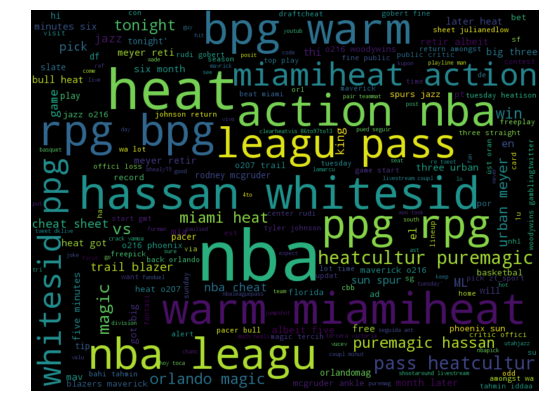

In [54]:
wordcloud_pic('Heat')

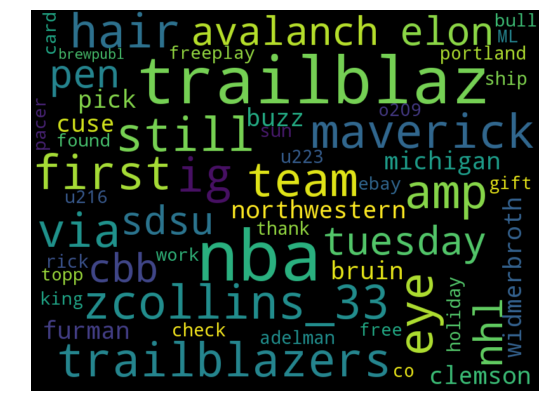

In [77]:
wordcloud_pic('Trailblazers')


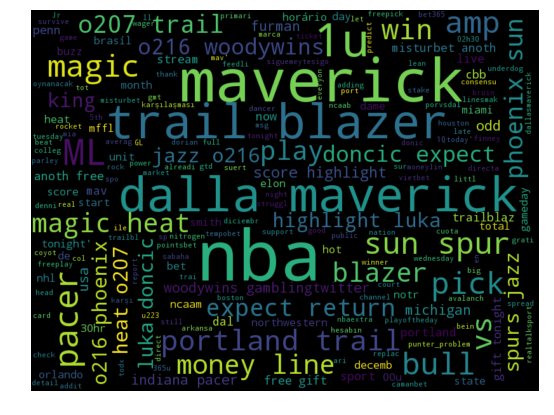

In [56]:
wordcloud_pic('Mavericks')

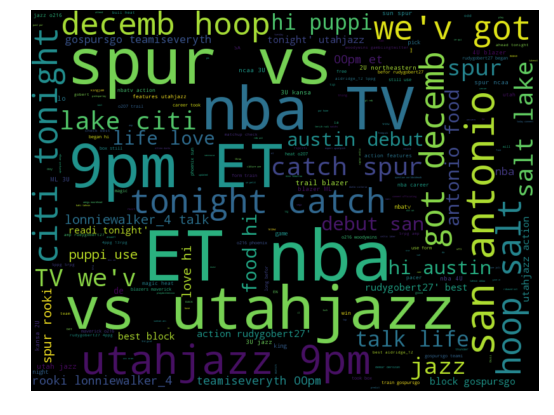

In [57]:
wordcloud_pic('Spurs')

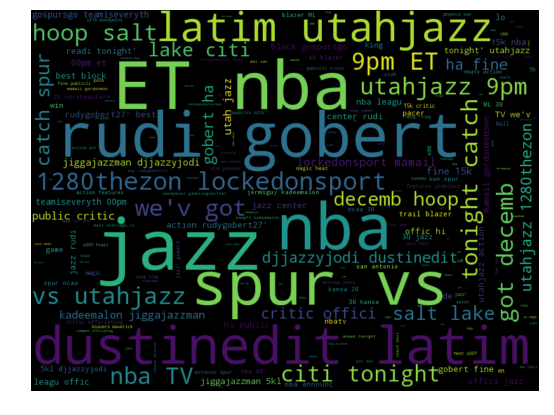

In [58]:
wordcloud_pic('Jazz')

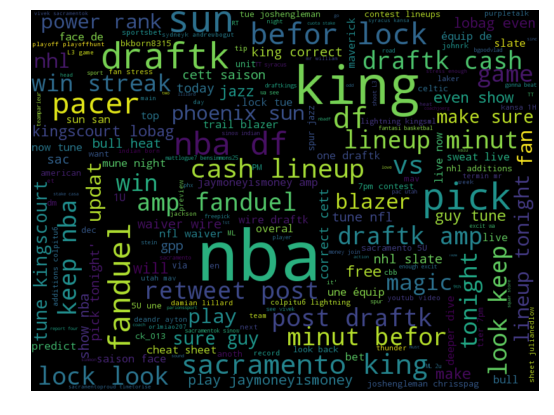

In [59]:
wordcloud_pic('Kings')

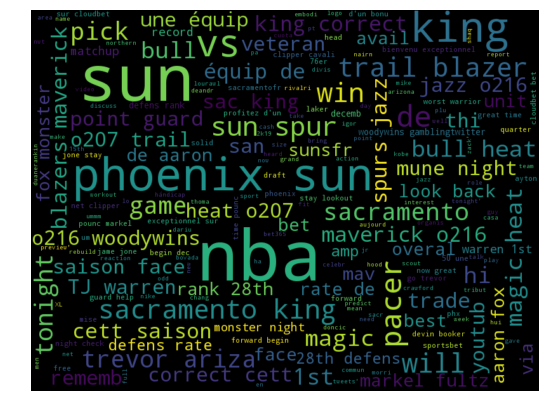

In [60]:
wordcloud_pic('Suns')

In [0]:
#wordcloud_pic('Rockets')

In [0]:
#wordcloud_pic('Timberwolves')

In [0]:
#wordcloud_pic('Clippers')


In [0]:
#wordcloud_pic('Pelicans')